## 1. Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam..

### Temos várias features em nosso banco de dados e podemos fazer várias combinações entre elas para investigar informações que poderiam ser relevantes, e o aconselhável seria fazer isto em um cenário real já que devemos utilizar os dados como uma fonte de luz para obter insights sem usar nossos julgamentos sobre o que é mais ou menos importante na hora de visualizar os dados. Mas como não é possível fazer todas as visualizações possíveis neste caso por uma questão de tempo e como é solicitado vou me atentar as estatísticas das quais eu julguei serem mais importantes.

In [2]:
# importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_train = pd.read_excel("cars_train.xlsx")

In [4]:
df_train.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,7473259008373930
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8196533263377470
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16282481447192


#### Vamos verificar os tipos de dados que estamos usando.

In [5]:
df_train.info(verbose = True,max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

#### Vamos verificar a quantidade de valores nulos no dataframe

In [6]:
df_train.isna().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

### Qual categoria de carro é mais frequente?

Como eu disse é possível ter várias combinações de features nos dados, por isto vou selecionar algumas features e criar uma terceira variável categórica que classifica a observação de acordo com essa combinação de features 

features consideradas: 
 - marca
 - tipo
 - modelo
 - cambio
 - ano de fabricação
 - número de portas
 - cor
 - hodometro

In [7]:
# Create a new variable by combining Feature1 and Feature2
df_train['categoria'] = df_train['marca'].astype(str)+df_train['tipo'].astype(str) +\
df_train['modelo'].astype(str) + df_train['cambio'].astype(str)  + \
df_train['ano_de_fabricacao'].astype(str) +df_train['num_portas'].astype(str) + \
df_train['cor'].astype(str)

print(df_train['categoria'])


0                            NISSANSedãKICKSCVT20174Branco
1                     JEEPSedãCOMPASSAutomática20174Branco
2                       KIASedãSORENTOAutomática20184Preto
3              VOLKSWAGENPicapeAMAROKAutomática20134Branco
4        SSANGYONGUtilitário esportivoKORANDOAutomática...
                               ...                        
29579               TOYOTAPicapeHILUXAutomática20214Branco
29580            VOLKSWAGENPicapePOLOAutomática20204Branco
29581                TOYOTAPicapeHILUXAutomática20194Cinza
29582                 PEUGEOTSedã2008Automática20214Branco
29583      AUDIUtilitário esportivoQ7Automática20164Branco
Name: categoria, Length: 29584, dtype: object


In [8]:
categoria_freq = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
soma_count = sum(categoria_freq['counts']) 
categoria_freq['Porcentagem'] = [(i/soma_count)*100 for i in categoria_freq['counts']]

In [9]:
categoria_freq.shape

(6174, 3)

Agora vamos observar quais são as categorias de veículos mais frequentes no banco de dados

In [10]:
fig = px.bar(categoria_freq, x="categoria", y="counts", color="counts", title="Gráfico de barras das duzentas categoria mais frequentes")
fig.update_xaxes(showticklabels=False)
fig.show()

Esse gráfico acima é um gráfico interativo, clique com o botão direito do mouse deixe apertado para dar zoom.

Podemos observar que a categoria de veículos mais vendidos segue um lei de potência, com poucas categorias mais frequentes e uma queda exponencial em relação a frequencia das outras categorias.

In [11]:
categoria_freq.head(30)

,categoria,counts,Porcentagem
0,PEUGEOTSedã2008Automática20214Branco,367,1.240535
1,PEUGEOTSedã2008Automática20204Branco,314,1.061385
2,JEEPSedãCOMPASSAutomática20194Branco,260,0.878853
3,FIATPicapeTOROAutomática20204Branco,217,0.733505
4,JEEPSedãCOMPASSAutomática20174Branco,216,0.730124
5,JEEPSedãCOMPASSAutomática20184Branco,211,0.713223
6,JEEPSedãCOMPASSAutomática20204Branco,188,0.635479
7,AUDISedãQ3Automática20174Branco,175,0.591536
8,PEUGEOTSedã2008Automática20194Branco,175,0.591536
9,VOLKSWAGENHatchbackPOLOAutomática20194Branco,151,0.510411


Acima temos as 30 categorias de veículos mais frequentes no banco de dados, os mais frequentes são :
 - Sedã automático da Peuget de 2014 e 2021 com 4 poretas e branco.
 - Sedã automático da Jeep de 2019 4 portas branco.
 - Picape Toro automático da Fiate de 2020 4 portas branco \
Entre outras categorias que podemos observar na tabela.

#### Hodômetro

Abaixo temos um boxplot junto com um violin plot do hodometro.

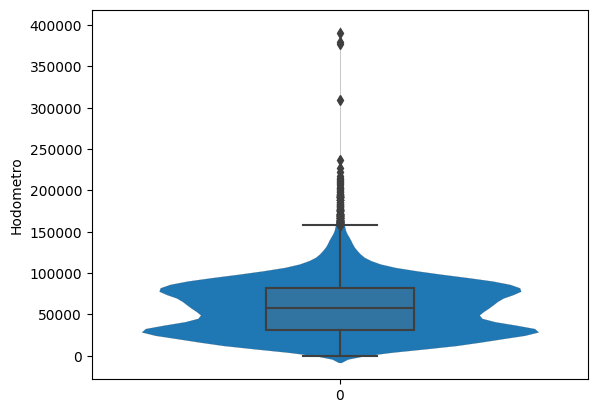

In [12]:
#plt.figure(figsize=(12,4))
ax = sns.violinplot(data = df_train['hodometro'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['hodometro'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Hodometro')
plt.show()

Podemos observar a distribuição dos dados pelo violin plot, de baixo pra cima observando no box plot temos um primeiro traço que representa o ponto em que começamos a ter dados, a extremidade inferior da caixa representa o primeiro quartil(que é equivalente ao percentil 25% dos dados, ou seja onde 25% dos dados estão), a linha dentro da caixa representa o segundo quartil(percentil 50% que é igual a mediana, que é igual a obervação que está no meio da distribuição dos dados), a extremidade superior da caixa representa o terceiro quartil(o percentil 75% dos dados) e a ultima linha na horizontal que é ortogonal a extremidade superior da caixa que representa o terceiro quartil representa o final dos dados onde paramos de ter dados. Os pontos após o final dos dados são os outliers, observações que se diferenciam muito da distribuição dos dados e que são obtidas com vários métodos diferentes no caso o seaborn se utiliza do método da amplitude interquartil onde ele considera observações que distam 1.5*(Q3-Q1) onde o Q3 é o terceiro quartil e o Q1 é o primeiro quartil.

Podemos observar que a distribuição do hodômetro é um pouco assimétrica e que possui dois picos de observações mais frequentes.

#### Quantidade de marcas únicas 

In [13]:
print("Quantidade de marcas únicas de carros", len(df_train.marca.unique()))

Quantidade de marcas únicas de carros 40


#### Frequencia das marcas no Banco de dados

In [14]:
# Vamos verificar a frequencia que cada marca aparece no banco de dados
frequencia_marca = pd.DataFrame(df_train.marca.value_counts())
soma = sum(frequencia_marca['count'])
frequencia_marca['porcentagem']=[(i/soma)*100 for i in frequencia_marca['count']]
frequencia_marca

,count,porcentagem
marca,,
VOLKSWAGEN,4594,15.528664
CHEVROLET,3020,10.208221
TOYOTA,2180,7.368848
HYUNDAI,2043,6.905760
JEEP,2000,6.760411
FIAT,1918,6.483234
BMW,1784,6.030287
AUDI,1698,5.739589
PEUGEOT,1675,5.661844


Podemos notar que as 5 marcas mais frequentes do banco de dados são VOLKSWAGEN, CHEVROLET, TOYOTA, HYUNDAI, JEEP

#### Quantidade de modelos de carros

In [15]:
print('Quantidade de modelos únicos de carros:',len(df_train.modelo.unique()))

Quantidade de modelos únicos de carros: 457


#### Quantidade de versões únicas de carros no banco de dados

In [16]:
print('Quantidade de versões únicas de carros:',len(df_train.versao.unique()))

Quantidade de versões únicas de carros: 1916


#### Número de fotos do veículo anunciado

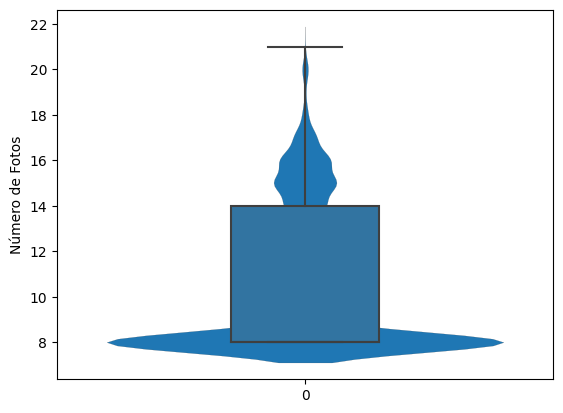

In [25]:
ax = sns.violinplot(data = df_train['num_fotos'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['num_fotos'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Número de Fotos')
plt.show()

Temos uma distribuição do número de fotos assimétrica, com a maior parte dos dados tendo entre zero e um pouco mais do que 8 fotos.

#### Ano de Fabricação

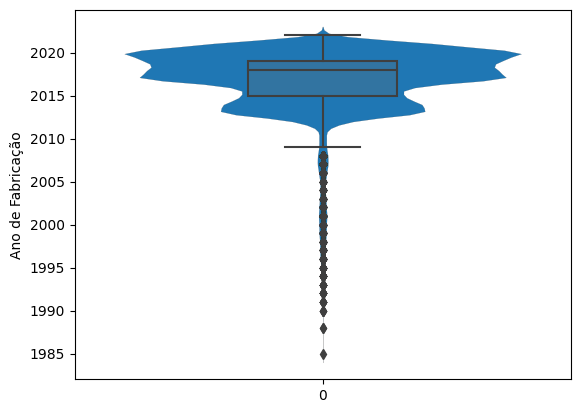

In [18]:
ax = sns.violinplot(data = df_train['ano_de_fabricacao'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['ano_de_fabricacao'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Ano de Fabricação')
plt.show()

Temos uma distribuição assimétrica do ano de fabricação também, com a maior parte dos anos de fabricação estando entre 2015 e 2020, e uma parcela considerável entre 2010 e 2015.

#### Ano do modelo

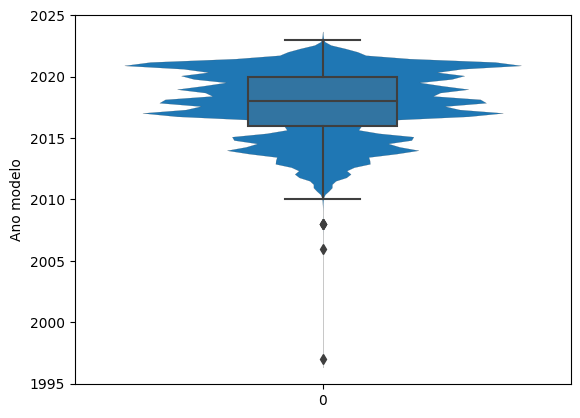

In [19]:
#### Ano de Fabricação
ax = sns.violinplot(data = df_train['ano_modelo'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['ano_modelo'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Ano modelo')
plt.xlabel("")
plt.show()

Aqui temos uma distribuição muito similar ao ano de fabricação, com a maior parte dos carros estando entre 2015 e 2020 e uma parcela considerável entre 2010 e 2015.

#### Estados mais frequentes no banco de dados

In [20]:
frequencia_estado = pd.DataFrame(df_train.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),16378,55.361006
Rio de Janeiro (RJ),2548,8.612764
Paraná (PR),2526,8.538399
Santa Catarina (SC),2302,7.781233
Minas Gerais (MG),1775,5.999865
Rio Grande do Sul (RS),1646,5.563818
Goiás (GO),789,2.666982
Bahia (BA),604,2.041644
Pernambuco (PE),318,1.074905


Mais da metade do Banco de dados se passa só no estado de São Paulo.

#### Os veículos já foram trocados antes?

In [21]:
frequencia_troca = pd.DataFrame(df_train.troca.value_counts())
soma = sum(frequencia_troca['count'])
frequencia_troca['porcentagem']=[(i/soma)*100 for i in frequencia_troca['count']]
frequencia_troca

,count,porcentagem
troca,,
False,24523,82.89278
True,5061,17.10722


Cerca de 82% dos veículos não foram trocados

#### Os veículos tiveram um único dono?

In [22]:
df_train.veiculo_único_dono.value_counts()

veiculo_único_dono
Único dono    10423
Name: count, dtype: int64

Aproximadamente 35,23% dos veículos tiveram apenas um único modelo.

Vamos fazer a suposição que os dados faltantes indicam que teve mais de um dono já que é uma variável dicotômica.

## 2 . Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio. Além disso,  responda também às seguintes perguntas de negócio:
## Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
## Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
## Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


# Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Poderíamos responder essa pergunta de várias formas diferentes, já que o "melhor" é algo um pouco relativo, ainda mais considerando o contexto de negócios, um estado poderia ter um bom mercado para carros populares, mas muitos concorrentes fortes tirando assim o peso desse estado na hora de respondermos a pergunta sobre qual seria o melhor estado para vender carros populares. Um estado pode não ter concorrentes mas ter uma demanda pequena tirando novamente o peso do estado na hora se respondermos a pergunta entre outras situações possíveis.

Aqui vamos fazer a suposição de que o melhor estado para se vender um carro popular seja o estado que tenha a maior frequência de carros com preço baixo, mas poderiamos analisar o melhor estado em termos de outras coisas.

#### Box plot do preço de acordo com o estado

In [56]:
# importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_train = pd.read_excel("cars_train.xlsx")

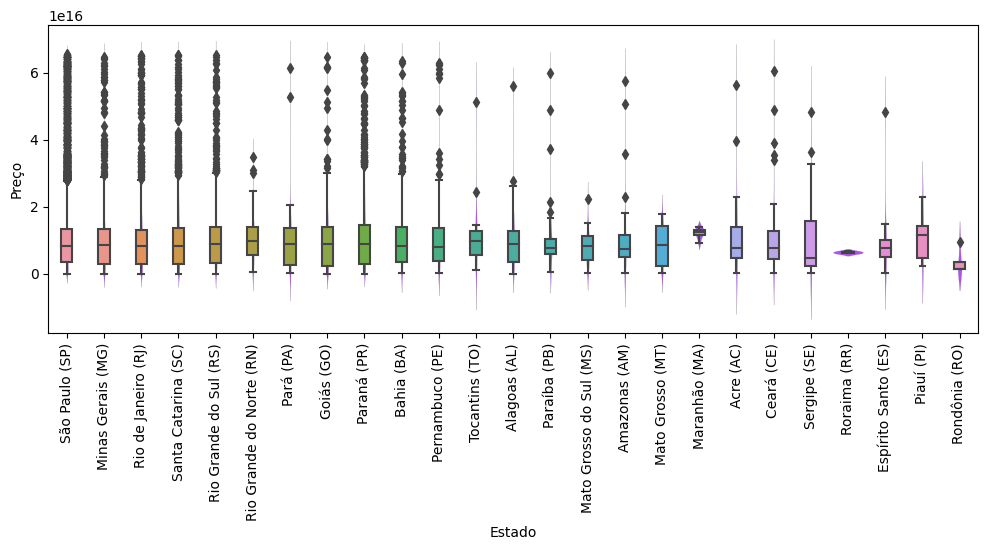

In [58]:
#estado_preco = pd.DataFrame(df_train[['estado_vendedor','preco']].melt() )
estad_preco = df_train[['estado_vendedor','preco']]
plt.figure(figsize=(12,4))
ax = sns.violinplot(data = estad_preco, x='estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=estad_preco, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.xticks(rotation = 90)
plt.ylabel('Preço')
plt.xlabel('Estado')
plt.show()

Observando o boxplot do preço de venda em cada estado podemos ter uma noção sobre a distribuição dos preços de vendas em cada estado e uma noção da variância do preço entre as cidades daquele estado através da distância interquartil, é importante lembrar que estamos DESCONSIDERANDO o modelo do carro, sua versão, ano de fabricação, marca e as outras features deste box plot. E o mercado de venda de carros de cada região muito provavelmente é diferente, então não podemos generalizar a nossas interpretações dizendo que "Em Rondônia o preço dos carros é mais barato, e carros em São Paulo são mais caros" já que o mercado de carros em Rondônia é diferente de São Paulo, em Rondônia pode haver uma maior demanda por carros de um determinado modelo de menor preço e um mercado menor quando comparado a São Paulo e em São Paulo pode haver a mesma demanda pelo mesmo modelo em Rondônia podendo ou não estar na mesma faixa de preço, mas em São Paulo temos uma população maior gerando um mercado maior com diferentes demandas de diferentes modelos de carros adicionando assim mais variação nos preços dos carros. \
 Essa informação é importante de se levar em conta na hora da precificação e negociação.

Segundo o boxplot a maioria dos Estados tem uma mediana de preços bastante próxima, e uma distância interquartil bastante próxima, com o estado com o maior número de outliers e uma das maiores distâncias interquartil sendo São Paulo e o estado com menor número de outliers e menor distãncia interquartil sendo Roraima.  

Considerando que o melhor estado para vender carro popular seja o estado com os menores preços os nossos melhores candidatos são Rondônia, Roraima, Piauí, Maranhão, Acre, Ceará, Sergipe, Sergipe, Maranhão, Espirito Santo e os outros estados tem distribuição parecida então decidimos incluir São Paulo por ter mais vendas.

Da parte 1 da nossa análise temos a porcentagem que cada estado representava do nosso dataset.

In [59]:
frequencia_estado = pd.DataFrame(df_train.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),16378,55.361006
Rio de Janeiro (RJ),2548,8.612764
Paraná (PR),2526,8.538399
Santa Catarina (SC),2302,7.781233
Minas Gerais (MG),1775,5.999865
Rio Grande do Sul (RS),1646,5.563818
Goiás (GO),789,2.666982
Bahia (BA),604,2.041644
Pernambuco (PE),318,1.074905


Vamos considerar que em São Paulo os carros com preços menores que a mediana dos preços de carros em São Paulo são carros populares e vamos observar a frequencia desse tipo de observação.

In [60]:
sp =  df_train[df_train['estado_vendedor']== 'São Paulo (SP)']
meidana_sp = sp['preco'].quantile(.5)

sp_preco_menor_mediana = sp[sp['preco'] < meidana_sp]

# Get the frequency of observations below the quartile value
freq_carros_menor_med = len(sp_preco_menor_mediana)

print("Quantidade de carros com preço popular no Estado de São Paulo:", freq_carros_menor_med)

Quantidade de carros com preço popular no Estado de São Paulo: 8189


### Considerando que o melhor estado seja o estado com menor preço o estado de Rondônia ganhou, mas temos apenas duas observações deste estado ou seja um problema de notificação deste estado no dataset, então essa conclusão é bastante perigosa, o mesmo acontece com os outros estados candidatos. Considerando que seja o melhor estado seja em termos do menor preço e maior frequencia de vendas no dataset o estado de São Paulo ganha, pois os carros populares em São Paulo corresponde a aproximadamente 25% do dataset(8189).

### O mais aconselhável seria dizer que São Paulo seria o melhor estado para vender carros populares, já que temos mais informação sobre esse estado em comparação aos outros. Mas muito provavelmente em termos de negócios deve ter muitos concorrentes e mais análises deveriam ser feitas para conseguirmos responder outras perguntas relacionadas a negócios com segurança.

# Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

Novamente a pergunta é um pouco relativa, e se for importante a picape com transmissão automática ter garantia, revisão em dia, 4 portas, vendedor confiável, ... entre outras variáveis.

Neste caso vamos considerar que o melhor estado para se comprar uma picape com transmissão automática seja o estado que tenha os menores preços de picapes com transmissão automática.

Para isso podemos selecionar as picapes com transmissão automática e visualizar a distribuição de preços.

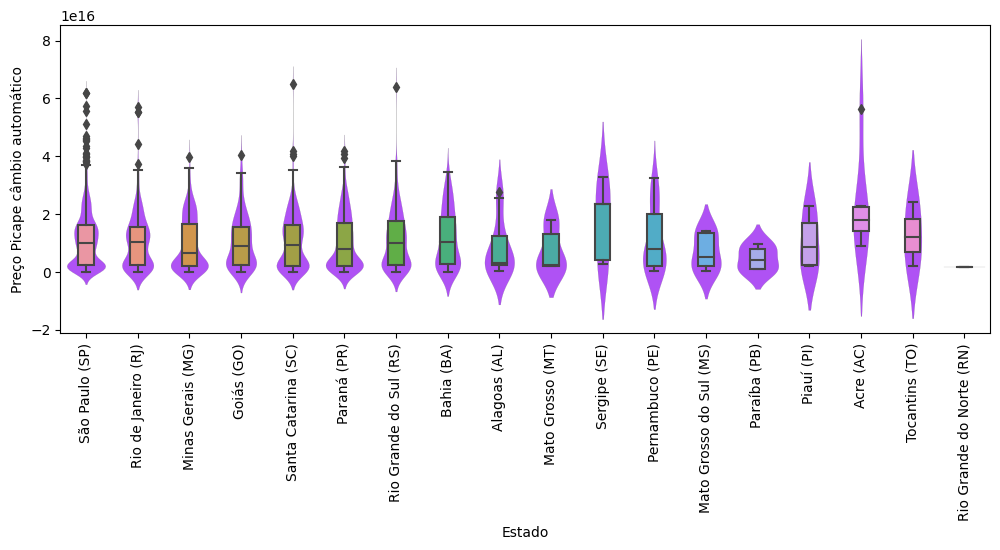

In [61]:
picape_transm_automatica = df_train[df_train['tipo']=='Picape']
picape_transm_automatica = picape_transm_automatica[picape_transm_automatica['cambio']=='Automática']

plt.figure(figsize=(12,4))

ax = sns.violinplot(data = picape_transm_automatica,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=picape_transm_automatica, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço Picape câmbio automático')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

Novamentes temos os estados na região Norte e nordeste sendo candidatos a melhor estado, mas novamente temos o problema de ter poucas observações destes estados tornando a decisão insegura.

In [62]:
print('Quantidade de picapes com transmissão automática em Paraíba:',
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Paraíba (PB)']))

Quantidade de picapes com transmissão automática em Paraíba: 4


In [63]:
print('Quantidade de picapes com transmissão automática em Mato Grosso:', 
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Mato Grosso (MT)']))

Quantidade de picapes com transmissão automática em Mato Grosso: 6


In [64]:
print('Quantidade de picapes com transmissão automática em Alagoas:',
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Alagoas (AL)']) )

Quantidade de picapes com transmissão automática em Alagoas: 12


In [65]:
print('Quantidade de picapes com transmissão automática em São Paulo:',
    len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='São Paulo (SP)']) )

Quantidade de picapes com transmissão automática em São Paulo: 1712


### O melhor estado para comprar uma Picape com transmissão automática é São Paulo, considerando que nosso critério seja a menor distribuição de preços e maior confiabilidade, ou seja mais informação sobre aquele estado. Desconsiderando a confiabilidade o melhor estado seria Alagoas ou Mato Grosso. Mas caso outros critérios sejam importantes como por exemplo garantia, revisão na concessionário etc. teríamos que aprofundar mais a nossa pesquisa para responder adequadamente.

# Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Novamente é relativo, mas vamos considerar que o melhor estado seja o estado com maior número de carros dentro da garantia de fábrica e possua os menores preços.

In [66]:
dentro_garantia = df_train[df_train['garantia_de_fábrica']=='Garantia de fábrica']

frequencia_estado = pd.DataFrame(dentro_garantia.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),2307,52.852234
Rio de Janeiro (RJ),412,9.438717
Paraná (PR),389,8.911798
Santa Catarina (SC),330,7.560137
Rio Grande do Sul (RS),281,6.437572
Minas Gerais (MG),264,6.048110
Goiás (GO),186,4.261168
Alagoas (AL),58,1.328751
Bahia (BA),51,1.168385


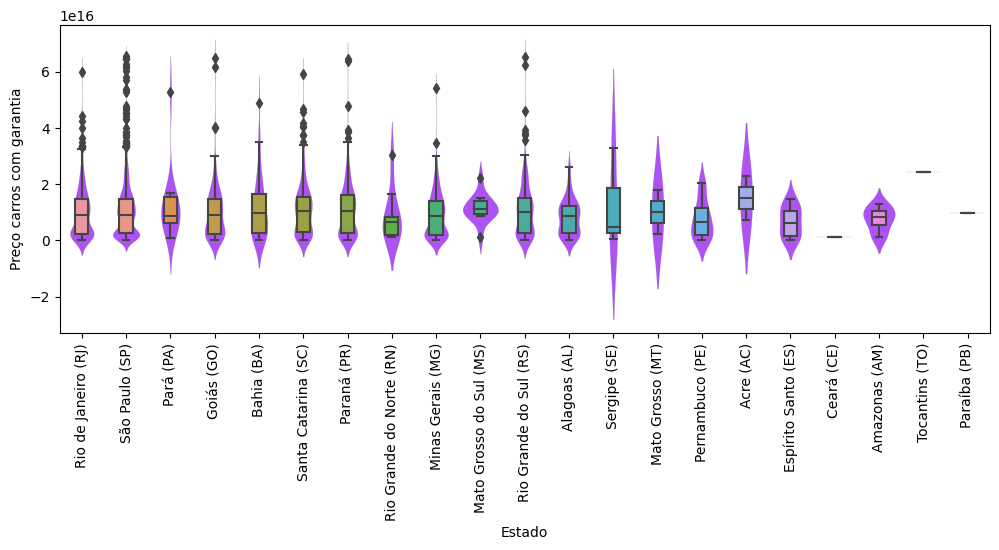

In [67]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = dentro_garantia,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=dentro_garantia, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço carros com garantia')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

### O melhor estado para comprar carro com garantia de fábrica é Rio de Janeiro porque é o estado com maior frequencia de preços baixos e menor distância interquartil quando comparado com outros estados indicando menor variação de preços, alguns possíveis concorrentes seriam São Paulo e Pára, considerando que o estado com maior número de carros dentro da garantia de fábrica e menores preços seja o melhor. Mas se outras variáveis fossem importantes nessa escolha teríamos que nos aprofundar ainda mais na nossa análise.

# Hipóteses propostas:

# Quais estados fizeram mais revisões nas concessionárias ?

Essa pergunta pode ser importante pois revender um carro que tenha problemas técnicos poderia fazer mal para a imagem do negócio, então vamos considerar o estado mais seguro o estado com maior número de carros que fizeram revisão na concessionária

In [68]:
revisao_conc = df_train[df_train['revisoes_concessionaria']=='Todas as revisões feitas pela concessionária']

frequencia_estado = pd.DataFrame(revisao_conc.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),5156,56.214566
Rio de Janeiro (RJ),811,8.842128
Paraná (PR),735,8.013519
Santa Catarina (SC),716,7.806367
Rio Grande do Sul (RS),682,7.435674
Minas Gerais (MG),560,6.105539
Goiás (GO),233,2.540340
Bahia (BA),86,0.937636
Alagoas (AL),51,0.556040


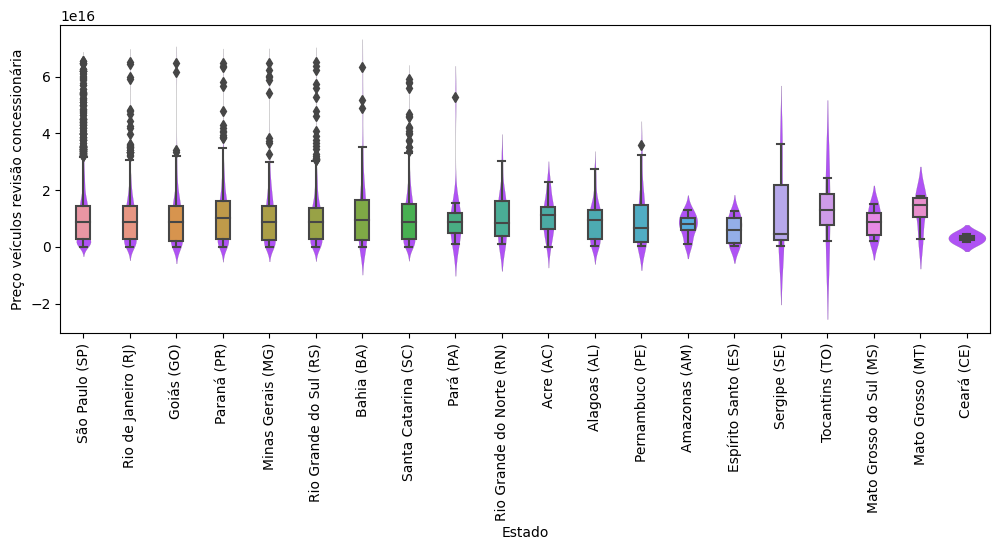

In [69]:

plt.figure(figsize=(12,4))
ax = sns.violinplot(data = revisao_conc,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=revisao_conc, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço veículos revisão concessionária')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

### Não é possível detectar uma diferença gritante entre as distribuições, ainda mais considerando que os estado mais a direita do gráfico possue menos observações, segundo os dados nenhum estado é mais perigoso nesse quesito, São Paulo, Rio de Janeiro e Goiás são os três estados com mais revisões em concessionárias então seriam os candidatos a serem mais seguros nesse quesito da revisão em concessionária. Naturalmente estes estados poderiam ser os estados com maior número de revisões em concessionárias por terem mais observações no banco de dados, então seria legal comparar os estados em termos de porcentagem de veículos que fizeram revisões em concessionárias.

Vamos considerar que os dados faltantes na coluna revisoes_concessionaria significam que não houve revisões nas concessionárias já que ela é uma variável dicotômica e as únicas observações dela indicam que houve revisão.

In [70]:
df_train['revisoes_concessionaria'] = df_train['revisoes_concessionaria'].fillna('Não foram todas as revisões feitas em concessionárias')
revisao_porc = df_train.groupby(['estado_vendedor'])['revisoes_concessionaria'].value_counts().reset_index(name='Count')
group_sums = revisao_porc.groupby('estado_vendedor')['Count'].sum()
revisao_porc['Percentage'] = revisao_porc.apply(lambda row: row['Count'] / group_sums[row['estado_vendedor']] * 100, axis=1)

revisao_porc

,estado_vendedor,revisoes_concessionaria,Count,Percentage
0,Acre (AC),Todas as revisões feitas pela concessionária,17,58.620690
1,Acre (AC),Não foram todas as revisões feitas em concessi...,12,41.379310
2,Alagoas (AL),Não foram todas as revisões feitas em concessi...,74,59.200000
3,Alagoas (AL),Todas as revisões feitas pela concessionária,51,40.800000
4,Amazonas (AM),Não foram todas as revisões feitas em concessi...,41,80.392157
5,Amazonas (AM),Todas as revisões feitas pela concessionária,10,19.607843
6,Bahia (BA),Não foram todas as revisões feitas em concessi...,518,85.761589
7,Bahia (BA),Todas as revisões feitas pela concessionária,86,14.238411
8,Ceará (CE),Não foram todas as revisões feitas em concessi...,67,97.101449
9,Ceará (CE),Todas as revisões feitas pela concessionária,2,2.898551


### Observando a tabela podemos verificar a quantidade em números e a porcentagem de carros que fizeram revisão nas concessionárias para compararmos, não é a forma mais eficiente de se visualizar esta contagem mas é útil porque alguns estados tem poucas observações o que atrapalha no calculo da porcentagem e essa informação é importante, mas entre os três primeiros estados com mais revisões cerca de trinta porcento dos veículos fizeram a revisão nas concessionárias que é uma padrão que aparece entre os estados mais populosos.

# As categorias mais vendidos possuem os menores preços?

Essa pergunta é importante para termos uma noção do preço das categorias de carros mais vendidos, e se eles variam muito ou não e se realmente existe a relação de que quanto mais frequente a categoria do carro no banco de dados mais barato é o preço do carro.

Usando a categoria criada na parte 1:

In [71]:
# Create a new variable by combining Feature1 and Feature2
df_train['categoria'] = df_train['marca'].astype(str)+df_train['tipo'].astype(str) +\
df_train['modelo'].astype(str) + df_train['cambio'].astype(str)  + \
df_train['ano_de_fabricacao'].astype(str) + df_train['num_portas'].astype(str) + \
df_train['cor'].astype(str)

Como tem muitas categorias de carros vamos observar os 20 mais frequentes

In [72]:
categoria_freq = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
categoria_freq= categoria_freq.iloc[0:20,:]

In [73]:
list(categoria_freq['categoria'])

['PEUGEOTSedã2008Automática20214Branco',
 'PEUGEOTSedã2008Automática20204Branco',
 'JEEPSedãCOMPASSAutomática20194Branco',
 'FIATPicapeTOROAutomática20204Branco',
 'JEEPSedãCOMPASSAutomática20174Branco',
 'JEEPSedãCOMPASSAutomática20184Branco',
 'JEEPSedãCOMPASSAutomática20204Branco',
 'AUDISedãQ3Automática20174Branco',
 'PEUGEOTSedã2008Automática20194Branco',
 'VOLKSWAGENHatchbackPOLOAutomática20194Branco',
 'BMWSedã320iAutomática20174Branco',
 'PEUGEOTSedã2008Automática20204Prata',
 'FIATPicapeTOROAutomática20194Branco',
 'VOLKSWAGENSedãT-CROSSAutomática20204Branco',
 'FIATPicapeTOROAutomática20184Branco',
 'PEUGEOTSedã2008Automática20214Prata',
 'FIATPicapeTOROAutomática20174Branco',
 'CHEVROLETSedãONIXAutomática20204Branco',
 'JEEPSedãCOMPASSAutomática20204Cinza',
 'AUDISedãQ3Automática20144Branco']

In [74]:
categoria_20 = df_train[df_train['categoria'].isin(categoria_freq['categoria'])]

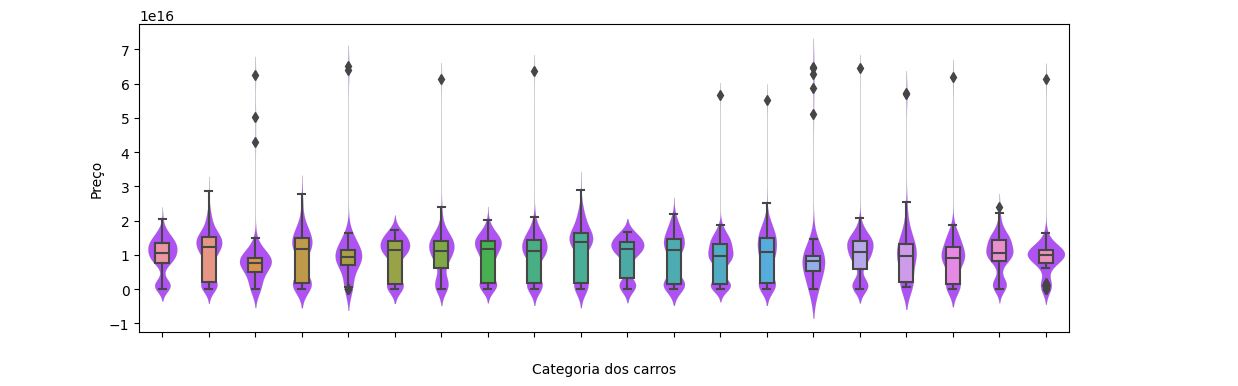

In [75]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = categoria_20, x = 'categoria', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=categoria_20 , x='categoria', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço')
plt.xticks(color='White')
plt.xlabel('Categoria dos carros')
plt.show()

Observe as categorias abaixo:

In [76]:
categoria_20 = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
soma_count = sum(categoria_20['counts']) 
categoria_20['Porcentagem'] = [(i/soma_count)*100 for i in categoria_20['counts']]
categoria_20= categoria_20.iloc[0:20,:]
categoria_20.head(20)

,categoria,counts,Porcentagem
0,PEUGEOTSedã2008Automática20214Branco,367,1.240535
1,PEUGEOTSedã2008Automática20204Branco,314,1.061385
2,JEEPSedãCOMPASSAutomática20194Branco,260,0.878853
3,FIATPicapeTOROAutomática20204Branco,217,0.733505
4,JEEPSedãCOMPASSAutomática20174Branco,216,0.730124
5,JEEPSedãCOMPASSAutomática20184Branco,211,0.713223
6,JEEPSedãCOMPASSAutomática20204Branco,188,0.635479
7,AUDISedãQ3Automática20174Branco,175,0.591536
8,PEUGEOTSedã2008Automática20194Branco,175,0.591536
9,VOLKSWAGENHatchbackPOLOAutomática20194Branco,151,0.510411


### Podemos perceber que a terceira categoria de carro mais vendida, a quinta e a vigésima possui menores preços em geral quando comparado com as outras categorias, mas em geral as categorias possuem distribuição de preço parecida, pelo menos entre as vinte categorias mais vendidas.

# O preço da categoria de carros mais vendidos varia de acordo com o estado?

Essa é uma hipótese importante pois se tivermos diferenças de preços dos carros entre os estados é possível lucrar mais vendendo um carro neste estado em específico que paga mais por aquela categoria de carro, a mudança de preço pode ser devida a várias razões, como por exemplo uma determinada categoria de carro ser mais adequada determinado tipo de bioma naquele estado e assim gera uma maior demanda e pela lei da oferta e demanda o preço pode aumentar.

Vamos testar para a picape toro da fiate, a quarta categoria mais vendida.

In [77]:
fiat_toro = df_train[df_train['categoria'] == 'FIATPicapeTOROAutomática20204Branco']

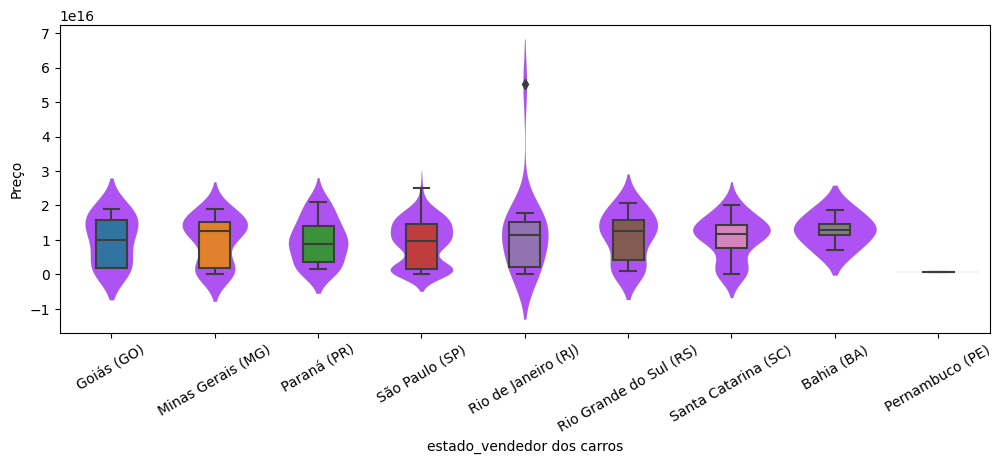

In [79]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = fiat_toro, x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=fiat_toro , x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço')
plt.xticks(rotation = 30)
plt.xlabel('estado_vendedor dos carros')
plt.show()

### Aparentemente na Bahia temos uma maior frequência de preços mais altos para a picape fiat toro, e distribuição com maior frequencia de preços mais altos em Santa Catarina, Rio Grande do Sul e Rio de Janeiro também quando comparado ao preço em outros estados.

# Obrigado pela atenção!!!

## 3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


### Existem muitas formas diferentes de se fazer a previsão dos preços dos carros a partir dos dados, poderíamos utilizar muitas abordagens diferentes e por isto o mais indicado seria fazermos previsões usando várias abordagens diferentes que façam sentido neste caso e analisar a performance de cada um dos modelos preditivos gerados, e utilizar todos eles simultâneamente de acordo com o caso onde o modelo ou os modelos específicos se performam melhor.
### Isso seria aconselhável porque a matemática e os modelos buscam generalizações mas a vida real é específica, neste contexto do modelo preditivo podemos ter um determinado tipo de modelo que faz uma previsão com maior acurácia em uma determinada região do Brasil e em outra região ele erra mais, e uma situação similar com outro modelo em outra região, entre outras situações que poderiam acontecer.

### Obviamente neste caso não vai ser possível fazer várias abordagens diferentes e uma análise da performance deles com todo esse nível de profundidade por uma questão de tempo.

### Poderíamos utilizar várias técnicas de feature engineering(utilizar nossas features para gerar outras features e adicionar mais informação relevante para o nosso modelo), poderíamos utilizar várias técnicas de feature importance(avaliar a importância das features para o nosso modelo) e vários modelos de previsão diferentes. Neste caso poderíamos fazer um modelo de regressão e de classificação, no caso de classificação se transformarmos intervalos de preço em variáveis categóricas que indicam um intervalo de preço poderíamos prever a faixa de preço de um carro ao invés de uma previsão pontual que fazemos em regressão e no contexto de negócios o time poderia utilizar aquela faixa de preço em negociações por exemplo.   

### Neste caso vou utilizar a seguinte abordagem:

### Vou tratar o problema como um problema de regressão, e vou dar preferência a modelos que tenha estrutura hierárquica, como por exemplo um modelo que tenha uma estrutura de árvore como o RandomForestRegressor porque temos muitas features categoricas e teoricamente muitas diferenças entre as categorias das features, como por exemplo a feature estado, na prática temos muitas diferenças regionais no Brasil então muitas diferenças entre as categorias dessa feature.

In [4]:
# pra rodar na nuvem google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# bibliotecas usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
# nuvem google colab
# df_train = pd.read_excel("drive/MyDrive/cars_train.xlsx")

In [7]:
# local
df_train = pd.read_excel("cars_train.xlsx")

Vamos observar a distribuição dos preços em geral

Text(0, 0.5, 'Frequência dos preços')

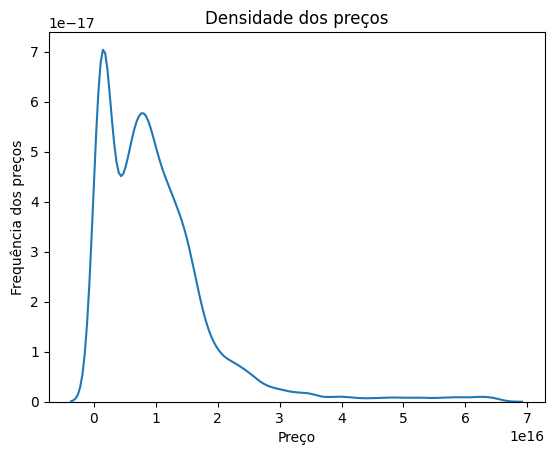

In [8]:
sns.kdeplot(x = df_train['preco'] )
plt.title('Densidade dos preços')
plt.xlabel("Preço")
plt.ylabel("Frequência dos preços")

Podemos observar que o preço tem uma distribuição assimétrica e com dois picos, seria um boa idéia utilizar o logaritmo do preço para suavizar a distribuição.

Text(0, 0.5, 'Frequência dos preços')

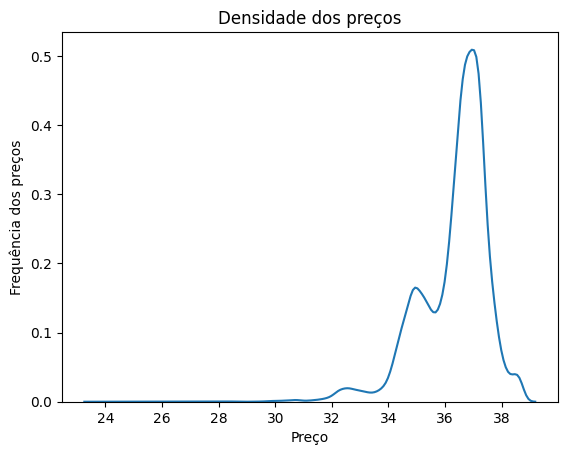

In [9]:
sns.kdeplot(x = np.log(df_train['preco']) )
plt.title('Densidade dos preços')
plt.xlabel("Preço")
plt.ylabel("Frequência dos preços")

In [10]:
df_train['preco'] = np.log(df_train['preco'])

Observamos que a distribuição dos preços é assimétrica, isso é importante de se considerar.

### Feature engineering

Criaremos a variável de categorias para descobrir quais as categorias de carros mais vendidos.

In [11]:
# Create a new variable by combining Feature1 and Feature2
df_train['categoria'] = df_train['marca'].astype(str)+df_train['tipo'].astype(str) +\
df_train['modelo'].astype(str) + df_train['cambio'].astype(str)  + \
df_train['ano_de_fabricacao'].astype(str) + df_train['num_portas'].astype(str) + \
df_train['cor'].astype(str)

In [12]:
df_train.isna().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
categoria                      0
dtype: int

### Vamos tratar estes dados faltantes para fazer nosso modelo.

Número de fotos

In [13]:
df_train['num_fotos'].describe()

count    29407.000000
mean        10.323834
std          3.487334
min          8.000000
25%          8.000000
50%          8.000000
75%         14.000000
max         21.000000
Name: num_fotos, dtype: float64

Existem várias técnicas pra tratar dados númericos faltantes, neste caso como o desvio-padrão que corresponde a std = 3 na tabela é pequeno, e a distância interquartil também não é grande( 14-8 = 6 ) vamos substituir os dados faltantes pela média mesmo para não adicionar muita variação aos dados, e no num_fotos também não temos muitos dados faltantes além de ser uma variável discreta, então isso já vai ser o suficiente.

In [14]:
df_train['num_fotos'] = df_train['num_fotos'].fillna(3.487334)

In [15]:
df_train['num_fotos'].describe()

count    29584.000000
mean        10.282932
std          3.516633
min          3.487334
25%          8.000000
50%          8.000000
75%         14.000000
max         21.000000
Name: num_fotos, dtype: float64

Como esperado adicionar a média no lugar dos dados faltantes não afetou muito a distribição dos dados.

As features: dono_aceita_troca, veiculo_único_dono, revisões_concessionarias, ipva_pago, veiculo_licenciado, veiculo_alienado, garantia_de_fábrica e revisoes_dentro_agenda são dicotômicas e suas únicas respostas tem conotação positiva então vamos fazer a suposição de que os dados faltantes estão indicando o negativo para o que a feature indica.

In [16]:
df_train['dono_aceita_troca'].value_counts()

dono_aceita_troca
Aceita troca    21922
Name: count, dtype: int64

In [17]:
df_train['veiculo_único_dono'].value_counts()

veiculo_único_dono
Único dono    10423
Name: count, dtype: int64

In [18]:
df_train['revisoes_concessionaria'].value_counts()

revisoes_concessionaria
Todas as revisões feitas pela concessionária    9172
Name: count, dtype: int64

In [19]:
df_train['ipva_pago'].value_counts()

ipva_pago
IPVA pago    19659
Name: count, dtype: int64

In [20]:
df_train['veiculo_licenciado'].value_counts()

veiculo_licenciado
Licenciado    15906
Name: count, dtype: int64

In [21]:
df_train['veiculo_alienado'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
df_train['garantia_de_fábrica'].value_counts()

garantia_de_fábrica
Garantia de fábrica    4365
Name: count, dtype: int64

In [23]:
df_train['revisoes_dentro_agenda'].value_counts()

revisoes_dentro_agenda
Todas as revisões feitas pela agenda do carro    5910
Name: count, dtype: int64

Por conta disso seria legal transformar essas variáveis dicotomicas em zero no caso onde falta a feature e igual a 1 no caso que houve a resposta positiva, e também transformar as outras variáveis categóricas em números que indicam as categorias para ajustarmos os modelos sem problemas.

In [24]:
df_train['modelo'] = df_train['modelo'].astype(str)
df_train['ano_de_fabricacao'] = df_train['ano_de_fabricacao'].astype(str)
df_train['ano_modelo'] = df_train['ano_modelo'].astype(str)


In [25]:
# preencher os espaços vazios
# e depois transformar em variável numérica

colunas = list(df_train.columns)
colunas.remove('id')
colunas.remove('num_fotos')
colunas.remove('hodometro')
colunas.remove('num_portas')
colunas.remove('preco')

encoder = LabelEncoder()
for coluna in colunas :
    df_train[coluna] = df_train[coluna].fillna('negativo')
    df_train[coluna] = encoder.fit_transform(df_train[coluna])

Dessa forma conseguimos fazer a transformação desejada.

In [26]:
df_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,categoria
0,300716223898539419613863097469899222392,8.0,27,257,424,29,10,67772.0,4,4,...,1,0,0,0,0,1,1,0,36.550108,4324
1,279639842134129588306469566150288644214,8.0,18,133,876,29,10,62979.0,2,4,...,0,0,1,0,1,1,1,0,36.642488,2908
2,56414460810621048900295678236538171981,16.0,19,378,1402,30,12,44070.0,2,4,...,0,0,1,1,1,1,1,0,30.421111,3055
3,56862509826849933428086372390159405545,14.0,38,63,1087,25,8,85357.0,2,4,...,0,0,1,0,0,1,1,0,37.053900,5627
4,338980975753200343894519909855598027197,8.0,33,259,1076,25,8,71491.0,2,4,...,1,0,0,1,1,0,0,0,34.345431,4910


### Vamos testar algumas abordagens diferentes

Vamos testar uma predição com e sem feature importance, vamos utilizar o método Select K-best com a função score mutual_info_regression, o método ordena as features apartir da sua importância para explicar a variável alvo que é calculada usando uma função que atribui um score para a feature e então selecionamos as K features mais importantes para explicar a variável alvo.

Criando os vetores X = features e y = target.

In [27]:
X = df_train.drop(columns=['id','preco'])
y = df_train['preco']
y = y.astype('float64')

In [28]:
# usando feature selection
feat_imp = SelectKBest(score_func=mutual_info_regression, k='all')
feat_imp.fit(X, y)
X_train_fi = feat_imp.transform(X)

In [29]:
X.shape

(29584, 28)

In [30]:
X_train_fi.shape

(29584, 28)

Podemos obervar que o método de seleção de features nos retornou o data set com todas as colunas, então podemos descartar a hipótese de que algumas features sejam menos importantes para explicar a variável alvo, então vamos prosseguir com todas as features.

# Previsão

## Vamos testar três modelos:
## - Random Forest Regression
## - Decision tree Regression
## - K Neighbors regression (um modelo inspirado nos k-vizinhos mais próximos mas adaptado para regressão)
## - Modelos ensemble para regressão, são conjuntos de modelos onde utilizamos a previsão de todos os modelos para fazer a previsão.

### Para avaliar a capacidade de generalização dos modelos vamos utilizar a técnica de validação cruzada houldout e cross validation, onde vamos dividir os dados entre dados de treino e dados de teste em uma certa proporção, o recomendado é ter mais dados de treino do que de teste, no caso vamos ter 40% de dados de teste e 60% de dados de treino, e vamos repetir este processo algumas vezes para não correr o risco de selecionar aleatoriamente uma amostra dos dados que não seja representativa para treinar o nosso modelo, no nosso caso vamos repetir este processo 3 vezes pois o custo computacional dos nossos modelos está um pouco grande e está demorando um pouco para rodar, mas poderíamos fazer mais.

### Métricas para avaliar o modelo de regressão:

### Como estamos lidando com um modelo de regressão que faz a previsão de uma quantidade numérica é muito difícil prever corretamente a quantidade numérica sem nenhum tipo de erro, então temos que escolher o modelo de regressão que comete menos erros na previsão.

### Denominamos essa diferença entre o valor que o modelo prevê e o valor verdadeiro de resíduo, e temos várias técnicas métricas para avaliar os resíduos do modelos que vamos utilizar, elas são:

# Vamos utilizar as seguintes métricas:

## Root Mean Squared Error (RMSE) em português Raiz do Erro Quadrático Médio(REQM)

### $MSE= \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\hat y_i - y_i)^2 } $

 - N é o número total de observações
 - $\hat y_i$ é o i-ésimo valor predito.
 - $ y_i $ é o i-ésimo valor verdadeiro na nossa variável alvo.

## Retiramos a raiz das diferenças ao quadrado pois se não elevarmos as diferenças ao quadrado teoricamente a soma tenderia a zero, porque teoricamente se o modelo esta bem ajustado ele retorna erros aleatórios pois ele captou os padrões existentes nos dados. E após retirar a média das diferenças ao quadrado retiramos a raiz para podermos interpretar a medida com maior facilidade.

## Mean Absolute Error (MAE) em português Erro absoluto médio(EAM)

### $MSE= \frac{1}{N}\sum_{i=1}^{N}|\hat y_i - y_i| $

 - N é o número total de observações
 - $\hat y_i$ é o i-ésimo valor predito.
 - $ y_i $ é o i-ésimo valor verdadeiro na nossa variável alvo.

## Nesta métrica retiramos a média do módulo das diferenças entre os valores preditos e os valores reais.

## Mean Percentage Error(MPE) ou Erro Percentual Absoluto Médio

### $MPE= \frac{1}{N}\sum_{i=1}^{N}\frac{|\hat y_i - y_i|}{y_i} $

## O Erro percentual absoluto médio retorna o erro percentual médio cometido pelo modelo ao fazer um previsão.

## É importante lembrar que como estamos lidando com uma regressão não-linear pois os nossos preços não tem comportamento linear, não podemos utilizar a métrica R-quadrado(R2) comumente usada para validar modelos de regressão lineares, pois esta métrica é invalida em modelos de regressão onde a variável dependente tem comportamento não linear.

## Também vamos fazer plots dos resíduos

In [31]:
# Modelos juntos com alguns hiperparâmetros para melhorar a performance.
# Random Forest Regressor
rfr_m = RandomForestRegressor(n_estimators=300)

# K Neighbors regressor
kr_m = KNeighborsRegressor(n_neighbors=25 , weights='distance')

# decision tree regressor
dtr_m = DecisionTreeRegressor(criterion='absolute_error')

# Voting regressor
vot = VotingRegressor([('rfr', rfr_m), ('kr', kr_m),('dct', dtr_m)])

# ATENÇÃO!! Esse PRÓXIMO BLOCO DE CÓDIGO DEMORA bastante tempo para EXECUTAR, cerca de 5 MINUTOS.

In [32]:
# cross validation, feita manualmente para fazermos os reajustes no mesmo modelo
# para utilizarmos para previsão depois.

rmse_rfr = []
rmse_kr = []
rmse_dtr = []
rmse_vot = []

mae_rfr = []
mae_kr = []
mae_dtr = []
mae_vot = []

mpe_rfr = []
mpe_kr = []
mpe_dtr = []
mpe_vot = []

for i in range(0,3):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  vot.fit(X_train, y_train)
  preds = pd.DataFrame(vot.transform(X_test)) # predição dos modelos individualmente
  vot_pred = vot.predict(X_test) # predição do voting regressor que tira uma média das regressões

  rmse_rfr.append(mean_squared_error(y_test, preds.iloc[:,0])) # rmse dos modelos individualmente
  rmse_dtr.append(mean_squared_error(y_test, preds.iloc[:,1]))
  rmse_kr.append(mean_squared_error(y_test, preds.iloc[:,2]))
  rmse_vot.append(mean_squared_error(y_test, vot_pred)) # e rmse voting

  mae_rfr.append(mean_absolute_error(y_test, preds.iloc[:,0])) # mean absolute error individuais
  mae_dtr.append(mean_absolute_error(y_test, preds.iloc[:,1]))
  mae_kr.append(mean_absolute_error(y_test, preds.iloc[:,2]))
  mae_vot.append(mean_absolute_error(y_test, vot_pred)) # mean absolute error voting regressor

  per_rfr = np.abs((y_test - preds.iloc[:,0]) / preds.iloc[:,0]) * 100
  mpe_rfr.append(np.mean(per_rfr))
  per_kr = np.abs((y_test - preds.iloc[:,1]) / preds.iloc[:,1]) * 100
  mpe_kr.append(np.mean(per_kr))
  per_dtr = np.abs((y_test - preds.iloc[:,2]) / preds.iloc[:,2]) * 100
  mpe_dtr.append(np.mean(per_dtr))
  per_vot = np.abs((y_test - vot_pred) / vot_pred) * 100
  mpe_vot.append(np.mean(per_vot))


In [33]:
print(' RMSE médio da cross validation do Random Forest Regressor:', np.mean(rmse_rfr), '\n',
'RMSE médio da cross validation do Decision Tree Regressor:', np.mean(rmse_dtr), '\n',
'RMSE médio da cross validation do K-Neighbors regression:', np.mean(rmse_kr), '\n',
'RMSE médio da cross validation do Voting regression:', np.mean(rmse_vot) )


 RMSE médio da cross validation do Random Forest Regressor: 1.60199034841822 
 RMSE médio da cross validation do Decision Tree Regressor: 1.583008572282151 
 RMSE médio da cross validation do K-Neighbors regression: 3.2544626524286624 
 RMSE médio da cross validation do Voting regression: 1.7486428182996703


In [34]:
print(' MAE médio da cross validation do Random Forest Regressor:', np.mean(mae_rfr), '\n',
'MAE médio da cross validation do Decision Tree Regressor:', np.mean(mae_dtr), '\n',
'MAE médio da cross validation do K-Neighbors regression:', np.mean(mae_kr), '\n',
'MAE médio da cross validation do Voting regression:', np.mean(mae_vot) )

 MAE médio da cross validation do Random Forest Regressor: 0.9601249638112824 
 MAE médio da cross validation do Decision Tree Regressor: 0.9490459470417213 
 MAE médio da cross validation do K-Neighbors regression: 1.2505617659012163 
 MAE médio da cross validation do Voting regression: 0.9874541266871649


In [35]:
print(' MPE médio da cross validation do Random Forest Regressor:', np.mean(mpe_rfr), '\n',
'MPE médio da cross validation do Decision Tree Regressor:', np.mean(mpe_dtr), '\n',
'MPE médio da cross validation do K-Neighbors regression:', np.mean(mpe_kr), '\n',
'MPE médio da cross validation do Voting regression:', np.mean(mpe_vot) )

 MPE médio da cross validation do Random Forest Regressor: 2.6732843310542935 
 MPE médio da cross validation do Decision Tree Regressor: 3.7547038470107683 
 MPE médio da cross validation do K-Neighbors regression: 2.608292699577627 
 MPE médio da cross validation do Voting regression: 2.728398428410339


## Observando as métricas podemos observar que os modelos tiveram poucas diferenças em suas métricas e de acordo com nossas métricas o nosso modelo está fazendo previsões de maneira aceitável com o voting regression cometendo aproximadamente 2.733% de erro percentual em suas previsões.

In [36]:
pred_dataset = pd.DataFrame(vot.transform(X))
vot_dataset = vot.predict(X)

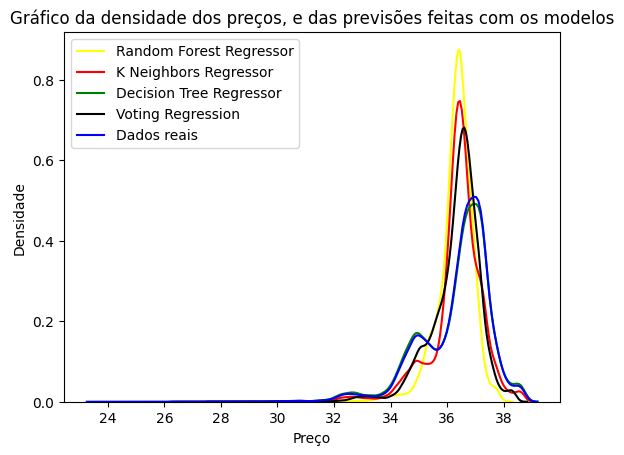

In [37]:
fig, ax = plt.subplots()

sns.kdeplot(x = pred_dataset.iloc[:,0], color='yellow', label='Random Forest Regressor',ax=ax)
sns.kdeplot(x = pred_dataset.iloc[:,1], color='red', label='K Neighbors Regressor',ax=ax)
sns.kdeplot(x = pred_dataset.iloc[:,2], color='green', label='Decision Tree Regressor',ax=ax)
sns.kdeplot(x = vot_dataset, color='black', label='Voting Regression',ax=ax)
sns.kdeplot(x = y, color='blue', label='Dados reais',ax=ax)

ax.set_title('Gráfico da densidade dos preços, e das previsões feitas com os modelos')
ax.set_xlabel('Preço')
ax.set_ylabel('Densidade')

# Add a legend using Matplotlib
ax.legend()

# Apply Seaborn style to the plot
sns.set()

# Display the plot
plt.show()


# Análise dos resíduos

## Resíduos normalizados - Nesta métrica calculamos os resíduos e dividimos eles pelo seu desvio-padrão para normalizar os resíduos, isto é útil para termos uma noção da distribuiçãio dos resíduos além de identificar se tem muitos resíduos grandes e também podemos ter uma noção aproximada de quantos desvio-padrões a nossa previsão esta errando observando o gráfico.

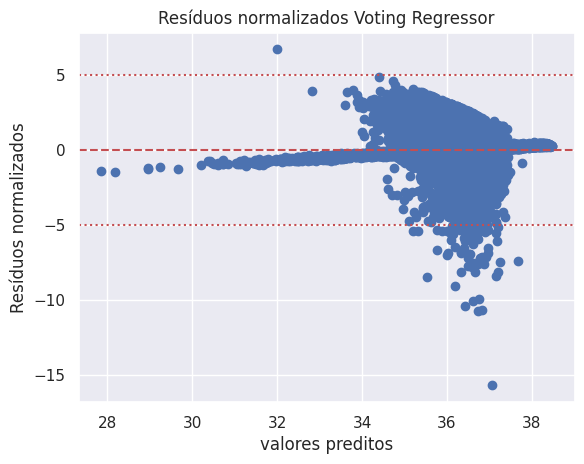

In [38]:
residuals = y - vot_dataset

# Calculate normalized residuals
std_dev = np.std(residuals)
normalized_residuals = residuals / std_dev

# Plot normalized residuals
plt.scatter(vot_dataset, normalized_residuals)
plt.xlabel("valores preditos")
plt.ylabel("Resíduos normalizados")
plt.title("Resíduos normalizados Voting Regressor")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle=':')
plt.axhline(y=-5, color='r', linestyle=':')
plt.show()

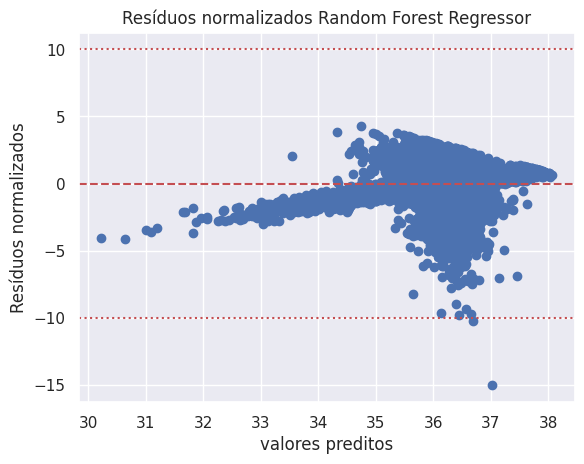

In [39]:
residuals = y - pred_dataset.iloc[:,0]

# Calculate normalized residuals
std_dev = np.std(residuals)
normalized_residuals = residuals / std_dev

# Plot normalized residuals
plt.scatter(pred_dataset.iloc[:,0], normalized_residuals)
plt.xlabel("valores preditos")
plt.ylabel("Resíduos normalizados")
plt.title("Resíduos normalizados Random Forest Regressor")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=10, color='r', linestyle=':')
plt.axhline(y=-10, color='r', linestyle=':')
plt.show()

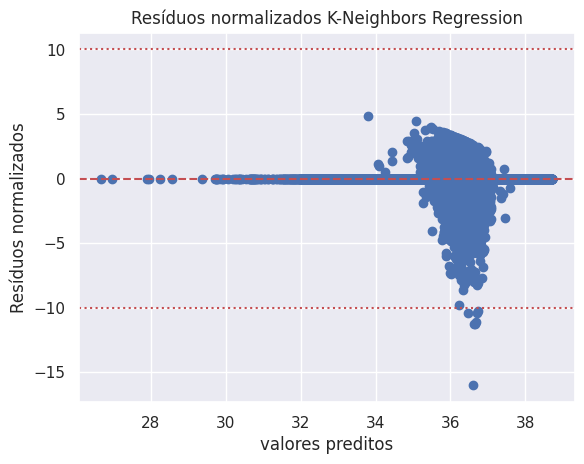

In [40]:
residuals = y - pred_dataset.iloc[:,1]

# Calculate normalized residuals
std_dev = np.std(residuals)
normalized_residuals = residuals / std_dev

# Plot normalized residuals
plt.scatter(pred_dataset.iloc[:,1], normalized_residuals)
plt.xlabel("valores preditos")
plt.ylabel("Resíduos normalizados")
plt.title("Resíduos normalizados K-Neighbors Regression")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=10, color='r', linestyle=':')
plt.axhline(y=-10, color='r', linestyle=':')
plt.show()

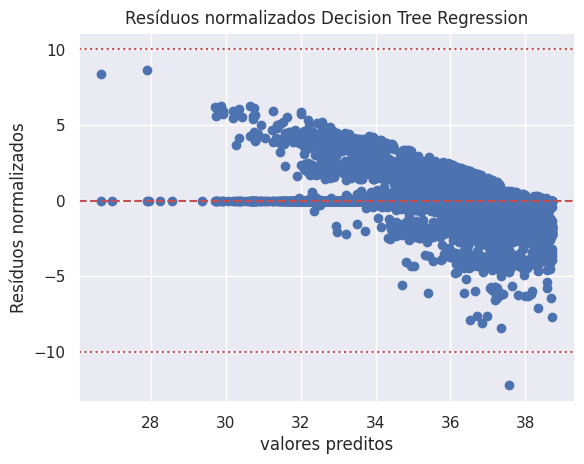

In [41]:
residuals = y - pred_dataset.iloc[:,2]

# Calculate normalized residuals
std_dev = np.std(residuals)
normalized_residuals = residuals / std_dev

# Plot normalized residuals
plt.scatter(pred_dataset.iloc[:,2], normalized_residuals)
plt.xlabel("valores preditos")
plt.ylabel("Resíduos normalizados")
plt.title("Resíduos normalizados Decision Tree Regression")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=10, color='r', linestyle=':')
plt.axhline(y=-10, color='r', linestyle=':')
plt.show()

Teoricamente ao normalizarmos os resíduos eles ficam na distribuição normal padrão com média zero e desvio padrão igual a 1, podemos observar que temos alguns resíduos com bastante desvios e outras com desvios menores e que mesmo os maiores desvios estão entre 10 desvios-padrão de distância da origem.

Por mais que o modelo apresentasse erro percentual médio entre 2-3% ele erra bastante em algumas previsões, e de fato em algumas previsões podemos ver que o erro não é tão grande assim. E por mais que o decision tree tenha uma densidade de preços praticamente idêntica aos dados reais ele apresenta resíduos mais dispersos do que os outros modelos porque na hora de fazer as previsões pontuais ele erra mais como podemos observar no seu erro percentual médio que é o maior entre os modelos e no gráfico de resíduos normalizados.

Para fazer a previsão nos dados de teste vou utilizar o Voting Regression pois ele retira uma média dos modelos e como não queremos ter um modelo que é sobreajustado aos dados ou sub-ajustado não seria uma má idéia utilizar a média deles.

Dados de teste

In [43]:
# abrir no drive
# df_test = pd.read_excel("drive/MyDrive/cars_test.xlsx")

In [44]:
# local
df_test = pd.read_excel("cars_test.xlsx")

In [45]:
#tratamento nos dados teste
df_test.isna().sum()

id                            0
num_fotos                    60
marca                         0
modelo                        0
versao                        0
ano_de_fabricacao             0
ano_modelo                    0
hodometro                     0
cambio                        0
num_portas                    0
tipo                          0
blindado                      0
cor                           0
tipo_vendedor                 0
cidade_vendedor               0
estado_vendedor               0
anunciante                    0
entrega_delivery              0
troca                         0
elegivel_revisao              0
dono_aceita_troca          2554
veiculo_único_dono         6387
revisoes_concessionaria    6795
ipva_pago                  3298
veiculo_licenciado         4518
garantia_de_fábrica        8439
revisoes_dentro_agenda     7869
veiculo_alienado           9862
dtype: int64

In [46]:
# Create a new variable by combining Feature1 and Feature2
df_test['categoria'] = df_test['marca'].astype(str)+df_test['tipo'].astype(str) +\
df_test['modelo'].astype(str) + df_test['cambio'].astype(str)  + \
df_test['ano_de_fabricacao'].astype(str) + df_test['num_portas'].astype(str) + \
df_test['cor'].astype(str)

In [47]:
df_test['num_fotos'].describe()

count    9802.000000
mean       10.323811
std         3.462367
min         8.000000
25%         8.000000
50%         8.000000
75%        14.000000
max        21.000000
Name: num_fotos, dtype: float64

In [48]:
df_test['num_fotos'] = df_test['num_fotos'].fillna(3.462367)

In [49]:
df_test['modelo'] = df_test['modelo'].astype(str)
df_test['ano_de_fabricacao'] = df_test['ano_de_fabricacao'].astype(str)
df_test['ano_modelo'] = df_test['ano_modelo'].astype(str)

In [50]:
# preencher os espaços vazios
# e depois transformar em variável numérica

colunas = list(df_test.columns)
colunas.remove('id')
colunas.remove('num_fotos')
colunas.remove('hodometro')
colunas.remove('num_portas')

encoder = LabelEncoder()
for coluna in colunas :
    df_test[coluna] = df_test[coluna].fillna('negativo')
    df_test[coluna] = encoder.fit_transform(df_test[coluna])

In [51]:
ids = df_test['id']

In [52]:
pred_test = vot.predict(df_test.drop(columns='id' ) )

Como o nosso modelo prevê o logaritmo do preço temos que fazer E^(número predito) para termos a previsão na unidade do problema

In [53]:
pred_test

array([35.39899897, 36.29300248, 36.44959665, ..., 35.73283578,
       36.98014771, 36.63675707])

In [54]:
pred_test = np.exp(pred_test)

In [55]:
predicao_teste_final = pd.DataFrame(
    {'id': ids,
    'preco': pred_test}
)

In [56]:
predicao_teste_final.shape

(9862, 2)

In [57]:
predicao_teste_final.to_csv('predicted.csv', index = False)
predicao_teste_final.to_excel('predicted.xlsx', index = False)

In [59]:
predicao_teste_final.head()

,id,preco
0,13518783164498355150900635905895481162,2.363687e+15
1,299896161723793383246777788797566040330,5.778974e+15
2,316180649972302128246133616457018378621,6.758630e+15
3,222527157104148385909188217274642813298,7.987749e+15
4,160460343059850745858546502614838368036,4.762497e+15
